In [37]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [90]:
N = 3
M = 2
V = 1
indices = np.arange(0,100,1)
J_V_ratio_routine = np.linspace(2,0,100)
mu_V_ratio_routine = np.linspace(0,0,100)

rescaled_energies = []
wavefunctions = []

for i in range(len(indices)):
    instantenous_hamiltonian = construct_rescaled_hamiltonian(N,M,V,mu_V_ratio=mu_V_ratio_routine[i], J_V_ratio=J_V_ratio_routine[i])
    eigenvalues, eigenvectors = exact_diagonalize(instantenous_hamiltonian)
    rescaled_energies.append(eigenvalues*1/N)
    wavefunctions.append(eigenvectors)
    
rescaled_energies = np.array(rescaled_energies)

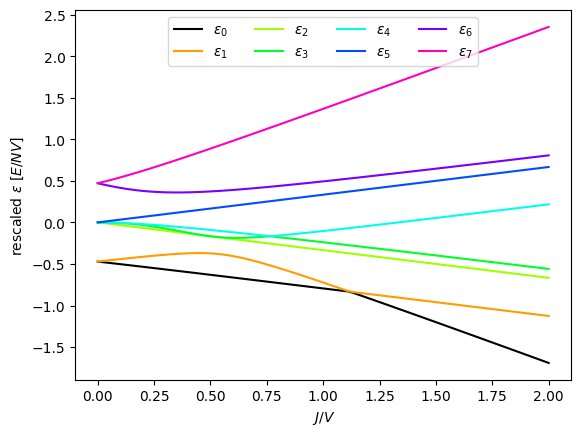

In [103]:
fig, ax = plt.subplots()
cmap = get_cmap("gist_rainbow", M**N)
for i in range(M**N):
    if i == 0:
        ax.plot(J_V_ratio_routine, rescaled_energies[:,i],"-k", label = "$\epsilon_0$")
    else:
        ax.plot(J_V_ratio_routine, rescaled_energies[:,i], color = cmap(i), label = f"$\epsilon_{i}$")
    
    ax.legend(ncols = M**N//2, loc = "upper center")
    ax.set_ylabel("rescaled $\epsilon$ $[E/NV]$")
    ax.set_xlabel("$J/V$")